<a href="https://colab.research.google.com/github/vismaya1705/Datascience/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd

In [28]:
df=pd.read_csv('/content/force2020_data.csv')

In [29]:
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


In [30]:
df.shape

(18270, 6)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [32]:
df.isna().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,4238
PEF,1830
DTC,81


In [33]:
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.133532,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.315346,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.506343,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


In [35]:
df.drop(['NPHI'],axis=1,inplace=True)

In [36]:
df.drop(['PEF'],axis=1,inplace=True)

In [51]:
df['DTC'].fillna(df['DTC'].mean(), inplace=True)

In [53]:
df.isna().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
DTC,0


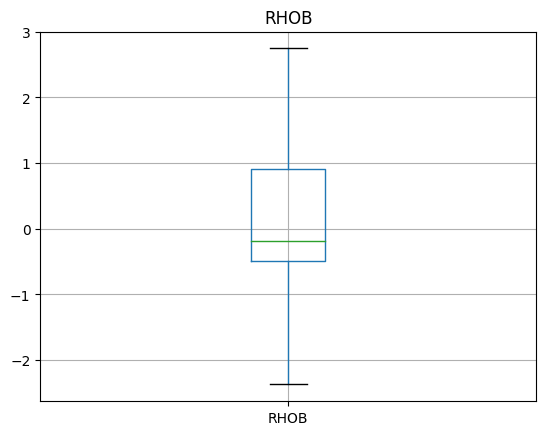

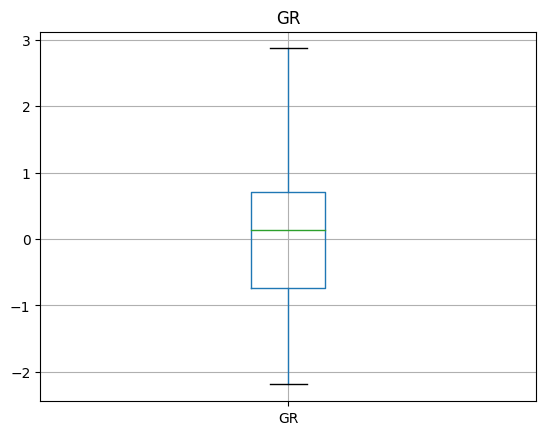

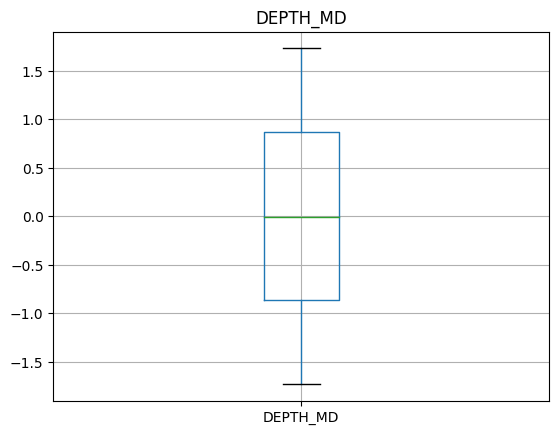

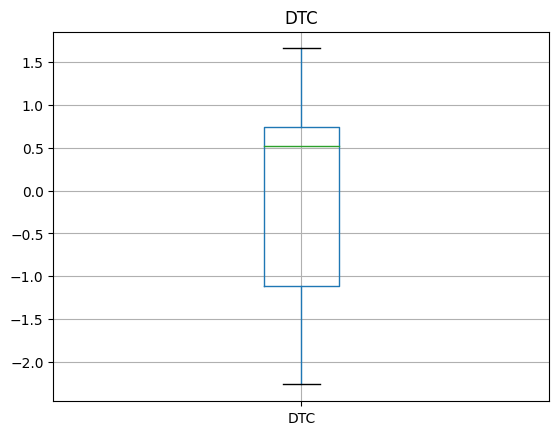

In [54]:
import matplotlib.pyplot as plt
for col in df.columns:
  plt.figure()
  df.boxplot([col])
  plt.title(col)

In [55]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
for col in df.columns:
  df[col]=scaler.fit_transform(df[[col]])

In [56]:
df_scaled = pd.DataFrame(df, columns=df.columns)
df_scaled

,RHOB,GR,DEPTH_MD,DTC
0,-0.759999,0.648114,-1.731721,1.179232e+00
1,-0.741163,0.612133,-1.731532,1.161958e+00
2,-0.718560,0.441774,-1.731342,1.147887e+00
3,-0.734045,0.367235,-1.731152,1.147096e+00
4,-0.773944,0.323128,-1.730963,1.146405e+00
...,...,...,...,...
18265,1.745819,-1.683564,1.731081,-2.221788e-18
18266,1.789158,-1.605864,1.731271,-2.221788e-18
18267,1.917421,-1.559734,1.731461,-2.221788e-18
18268,2.109002,-1.574822,1.731650,-2.221788e-18


In [57]:
  df.head()

,RHOB,GR,DEPTH_MD,DTC
0,-0.759999,0.648114,-1.731721,1.179232
1,-0.741163,0.612133,-1.731532,1.161958
2,-0.718560,0.441774,-1.731342,1.147887
3,-0.734045,0.367235,-1.731152,1.147096
4,-0.773944,0.323128,-1.730963,1.146405


In [58]:
df_scaled_clean = df_scaled.dropna()
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled_clean)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [59]:
print(df_scaled.isna().sum())  # Shows the number of NaNs in each column


RHOB        0
GR          0
DEPTH_MD    0
DTC         0
dtype: int64


In [60]:
pred_cluster = kmeans.predict(df_scaled)

In [61]:
pred_cluster

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

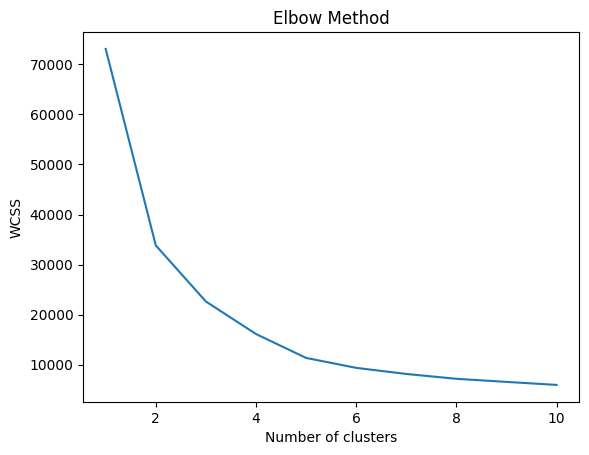

In [62]:
wcss = []
for i in range(1, 11):
   kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
   kmeans.fit(df)
   wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [63]:
from sklearn.cluster import AgglomerativeClustering
agglo_clustering = AgglomerativeClustering(metric='euclidean', linkage='ward')
y_agglo = agglo_clustering.fit_predict(df)


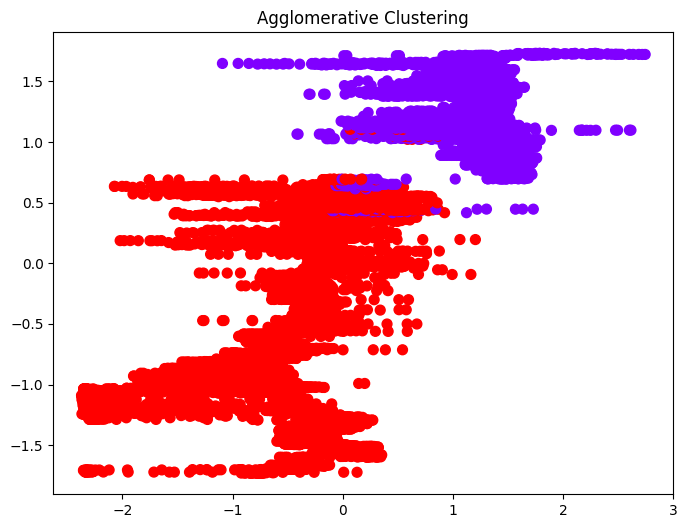

In [72]:
plt.figure(figsize=(8, 6))
plt.scatter(df['RHOB'],df['DEPTH_MD'], c=y_agglo, cmap='rainbow',s=50)
centroids = kmeans.cluster_centers_
plt.title('Agglomerative Clustering')
plt.show()

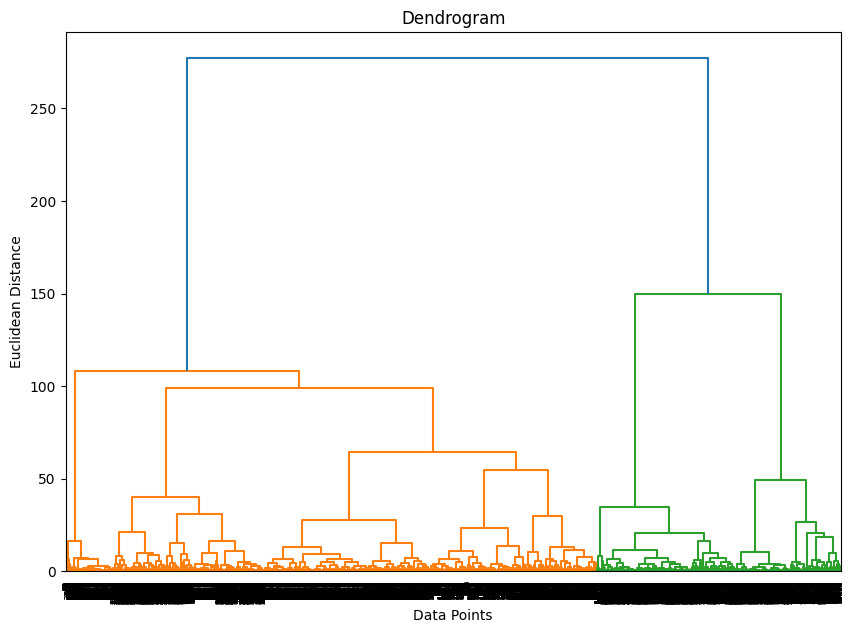

In [66]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(df, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [67]:
from sklearn.metrics import silhouette_score

In [68]:
silhouette_avg = silhouette_score(df, y_agglo)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5217505437642632


In [69]:
silh_score = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(df)
    silh_avg = silhouette_score(df, labels)
    silh_score.append(silh_avg)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

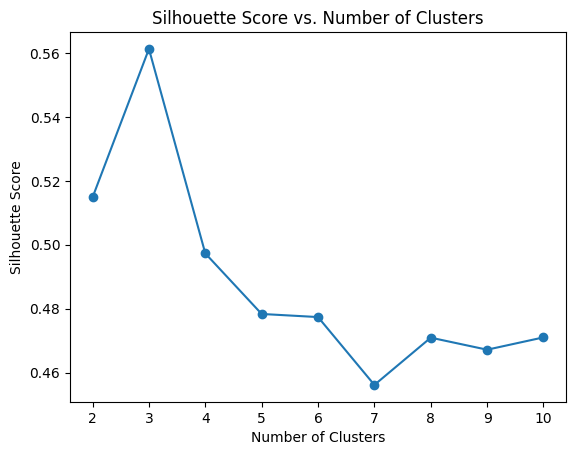

In [70]:
plt.plot(range(2, 11), silh_score, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()